1. Menggunakan dataset StudentPerformance ( [StudentPerformance-encoded.csv](https://drive.google.com/file/d/1VM4DhdGyqXADYr9ZTExBnp7D4R1wmwCS/view?usp=share_link) ) 
2. Lakukan feature selection terhadap fitur "lulus_tepatwaktu" menggunakan metode : PEARSON CORRELATION
3. Pilih fitur yang memiliki korelasi >= 0.5
4. Gunakan nilai test data sebesar 0.3 dan randomstate = 21
5. Terapkan metode NAIVE BAYES untuk predict fitur "lulus_tepatwaktu"
6. Tampilkan hasil evaluasi model terhadap test data 

**Penamaan File : NIM_NaiveBayes.ipynb**

##**NAMA : FATHURRAHMAN NUR AZIZ**
##**NIM : 20.11.3694**

In [1]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

In [2]:
#membaca dataset csv

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA MINING 3/StudentPerformance-encoded.csv')

url = 'https://raw.githubusercontent.com/azizfath/bddm3/main/datasets/week8/StudentPerformance-encoded.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,jenis_kelamin,umur,konsentrasi,asal,kos,uang_saku,paket_data,kendaraan,laptop,...,jumlah_org,score_toefl,jumlah_lomba,keadaan_ortu_divorced,romance,ukuran_sepatu,tinggi_badan,berat_badan,ipk,lulus_tepatwaktu
0,0,0,20,2,12,0,200000,50000,1,1,...,2,119,0,0,1,41,165,62.5,3.86,1
1,1,1,19,0,3,1,500000,70000,0,1,...,2,117,4,0,0,38,141,57.9,3.96,1
2,2,0,22,1,12,0,300000,100000,1,1,...,1,90,2,0,1,42,151,59.8,3.68,0
3,3,0,20,0,12,0,700000,100000,2,1,...,1,97,0,0,1,41,140,57.8,3.69,0
4,4,0,21,1,11,1,800000,80000,0,1,...,1,114,0,0,1,40,165,62.5,3.68,0


##PEARSON CORRELATION

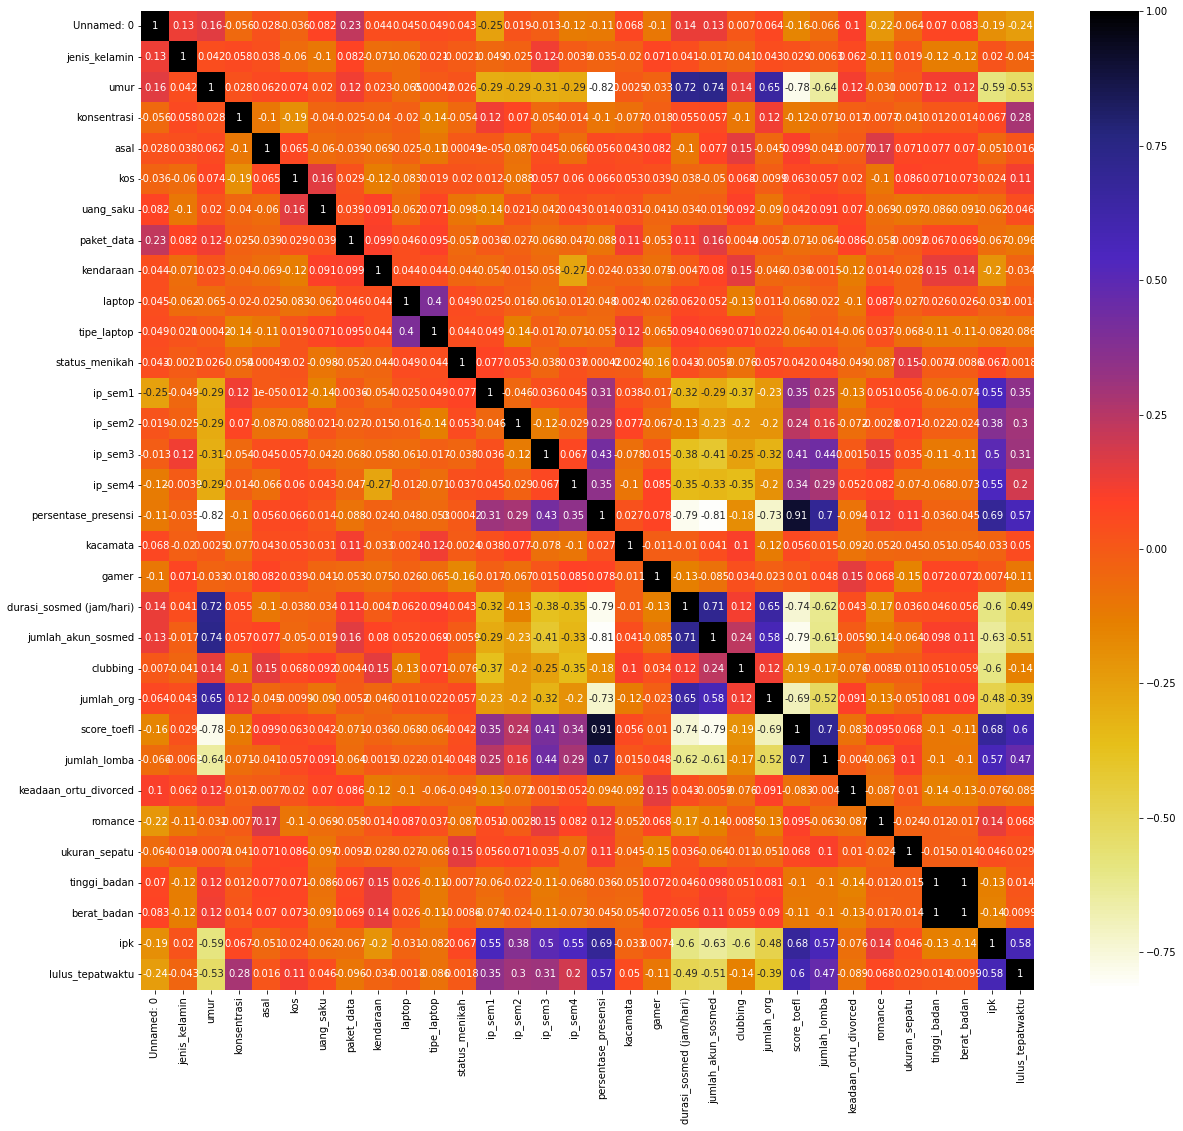

In [3]:
#mencari korelasi dengan method df.corr()
corr = df.corr()

#menampikan heatmap dari korelasi
plt.figure(figsize=(20,18))
sns.heatmap(corr,cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

In [4]:
#korelasi dengan variabel 'lulus_tepatwaktu'
corr_lulus = abs(corr['lulus_tepatwaktu'])

#memilih korelasi >=5
relevant_features = corr_lulus[corr_lulus>=0.5]
relevant_features

umur                   0.534956
persentase_presensi    0.568904
jumlah_akun_sosmed     0.509860
score_toefl            0.595081
ipk                    0.582700
lulus_tepatwaktu       1.000000
Name: lulus_tepatwaktu, dtype: float64

In [5]:
#drop kolom yang tidak terpakai
df.drop(['Unnamed: 0', 'jenis_kelamin', 'konsentrasi', 'asal', 'kos',
       'uang_saku', 'paket_data', 'kendaraan', 'laptop', 'tipe_laptop',
       'status_menikah', 'ip_sem1', 'ip_sem2', 'ip_sem3', 'ip_sem4',
       'kacamata', 'gamer', 'durasi_sosmed (jam/hari)',
       'clubbing', 'jumlah_org',
       'jumlah_lomba', 'keadaan_ortu_divorced', 'romance', 'ukuran_sepatu',
       'tinggi_badan', 'berat_badan'], axis=1, inplace=True)

#melihat kolom dataframe yang telah dihapus kolomnya
print(df.columns)
df.head()

Index(['umur', 'persentase_presensi', 'jumlah_akun_sosmed', 'score_toefl',
       'ipk', 'lulus_tepatwaktu'],
      dtype='object')


,umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk,lulus_tepatwaktu
0,20,97,1,119,3.86,1
1,19,90,1,117,3.96,1
2,22,85,2,90,3.68,0
3,20,86,1,97,3.69,0
4,21,91,1,114,3.68,0


##NAIVE BAYES CLASSIFICATION

In [6]:
#X = independent variable --> 'umur', 'persentase_presensi', 'jumlah_akun_sosmed', 'score_toefl','ipk'
X = df.iloc[:,[0,1,2,3,4]].values

#Y = dependent variabel --> 'lulus_tepatwaktu'
y = df.iloc[:,5].values

In [7]:
#menampilkan 10 nilai X dan y

print(f'X: \n {X[:10]}')
print(f'y: \n {y[:10]}')

X: 
 [[ 20.    97.     1.   119.     3.86]
 [ 19.    90.     1.   117.     3.96]
 [ 22.    85.     2.    90.     3.68]
 [ 20.    86.     1.    97.     3.69]
 [ 21.    91.     1.   114.     3.68]
 [ 21.    86.     2.    99.     3.89]
 [ 27.    43.     3.    47.     3.59]
 [ 20.    85.     2.    95.     3.74]
 [ 20.    98.     2.   107.     3.6 ]
 [ 26.    52.     4.    52.     3.48]]
y: 
 [1 1 0 0 0 1 0 1 0 0]


In [8]:
#split dataset menjadi data training dan data test
#dengan data test = 0.3 dan randomstate = 21

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21)

In [9]:
#print bentuk dari hasil data split
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (105, 5)
X_test shape:  (45, 5)
y_train shape:  (105,)
y_test shape:  (45,)


In [10]:
#membuat model klasifikasi dengan Gaussian Naive Bayes

classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [11]:
#melakukan prediksi

y_pred = classifier.predict(X_test)

In [12]:
#menampilkan hasil prediksi 15 kolom pertama
print('index \t prediksi lulus tepat waktu');
for i,y in enumerate(y_pred[:15]):
  print(f'{i} \t {y}')

index 	 prediksi lulus tepat waktu
0 	 1
1 	 0
2 	 1
3 	 0
4 	 0
5 	 0
6 	 0
7 	 0
8 	 0
9 	 0
10 	 0
11 	 0
12 	 0
13 	 1
14 	 0


In [13]:
#melihat probabilitas dari data test

classifier.predict_proba(X_test)

array([[1.34439418e-03, 9.98655606e-01],
       [1.00000000e+00, 4.54058518e-47],
       [4.55750461e-03, 9.95442495e-01],
       [1.00000000e+00, 4.79238817e-43],
       [1.00000000e+00, 1.05607552e-26],
       [1.00000000e+00, 2.65197379e-41],
       [1.00000000e+00, 5.29262392e-41],
       [1.00000000e+00, 3.44768185e-28],
       [1.00000000e+00, 1.84298787e-39],
       [1.00000000e+00, 3.77933401e-36],
       [1.00000000e+00, 1.02542691e-43],
       [1.00000000e+00, 8.53313019e-50],
       [1.00000000e+00, 1.02239647e-42],
       [4.62785089e-03, 9.95372149e-01],
       [1.00000000e+00, 4.04662685e-36],
       [1.00000000e+00, 6.80569990e-45],
       [1.00000000e+00, 1.41952385e-38],
       [1.00000000e+00, 2.70408843e-22],
       [1.00000000e+00, 2.56280940e-37],
       [1.00000000e+00, 8.81263460e-42],
       [1.00000000e+00, 1.21350292e-43],
       [1.00000000e+00, 1.27462181e-31],
       [1.00000000e+00, 4.23951192e-30],
       [1.00000000e+00, 5.92428777e-31],
       [4.441309

In [14]:
#membuat fungsi untuk prediksi
def predict(umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk):
  input = [[umur,persentase_presensi,jumlah_akun_sosmed,score_toefl,ipk]]
  print(f'Class Prediction : {classifier.predict(input)}')
  print(f'Probability : {classifier.predict_proba(input)}')

In [15]:
#mencoba fungsi prediksi
predict(25,85,1,85,3.4)

Class Prediction : [0]
Probability : [[9.99999957e-01 4.33533602e-08]]


##EVALUASI MODEL

In [16]:
#print classification report
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.50      1.00      0.67         4

    accuracy                           0.91        45
   macro avg       0.75      0.95      0.81        45
weighted avg       0.96      0.91      0.92        45



**dilihat dari classification report tersebut maka kita mendapatkan akurasi sebesar 91%**

In [17]:
#confussion matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[37,  4],
       [ 0,  4]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


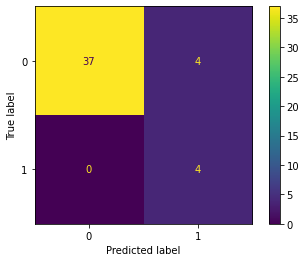

In [18]:
#plot confusion matrix

plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()